In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ts_pred = pd.read_csv('/data/wang/junh/results/Fuse_moe/all_los/TS_test_predictions.csv')
text_pred = pd.read_csv('/data/wang/junh/results/Fuse_moe/all_los/Text_test_predictions.csv')
cxr_pred = pd.read_csv('/data/wang/junh/results/Fuse_moe/all_los/CXR_test_predictions.csv')
multi_pred = pd.read_csv('/data/wang/junh/results/Fuse_moe/all_los/TS_CXR_Text_test_predictions.csv')

In [13]:
all_pred = pd.DataFrame(data={
        'TS': ts_pred['Predicted'],
        'Text': text_pred['Predicted'],
        'CXR': cxr_pred['Predicted'],
        'Multi': multi_pred['Predicted'],
    })
print(all_pred.head())

   TS  Text  CXR  Multi
0   1     0    1      0
1   1     0    1      1
2   1     1    0      1
3   1     1    0      1
4   1     1    1      1


In [14]:
# Define a function to assign PID based on the rules
def assign_pid(row):
    if row['TS'] == 0 and row['Text'] == 0 and row['CXR'] == 0 and row['Multi'] == 0:
        return 'R'
    elif row['TS'] == 0 and row['Text'] == 0 and row['CXR'] == 1 and row['Multi'] == 0:
        return 'Umaj'
    elif row['TS'] == 0 and row['Text'] == 1 and row['CXR'] == 0 and row['Multi'] == 0:
        return 'Umaj'
    elif row['TS'] == 0 and row['Text'] == 1 and row['CXR'] == 1 and row['Multi'] == 0:
        return 'Umin'
    elif row['TS'] == 1 and row['Text'] == 0 and row['CXR'] == 0 and row['Multi'] == 0:
        return 'Umaj'
    elif row['TS'] == 1 and row['Text'] == 0 and row['CXR'] == 1 and row['Multi'] == 0:
        return 'Umin'
    elif row['TS'] == 1 and row['Text'] == 1 and row['CXR'] == 0 and row['Multi'] == 0:
        return 'Umin'
    elif row['TS'] == 1 and row['Text'] == 1 and row['CXR'] == 1 and row['Multi'] == 0:
        return 'S'
    elif row['TS'] == 0 and row['Text'] == 0 and row['CXR'] == 0 and row['Multi'] == 1:
        return 'S'
    elif row['TS'] == 0 and row['Text'] == 0 and row['CXR'] == 1 and row['Multi'] == 1:
        return 'Umin'
    elif row['TS'] == 0 and row['Text'] == 1 and row['CXR'] == 0 and row['Multi'] == 1:
        return 'Umaj'
    elif row['TS'] == 0 and row['Text'] == 1 and row['CXR'] == 1 and row['Multi'] == 1:
        return 'Umaj'
    elif row['TS'] == 1 and row['Text'] == 0 and row['CXR'] == 0 and row['Multi'] == 1:
        return 'Umin'
    elif row['TS'] == 1 and row['Text'] == 0 and row['CXR'] == 1 and row['Multi'] == 1:
        return 'Umaj'
    elif row['TS'] == 1 and row['Text'] == 1 and row['CXR'] == 0 and row['Multi'] == 1:
        return 'Umin'
    elif row['TS'] == 1 and row['Text'] == 1 and row['CXR'] == 1 and row['Multi'] == 1:
        return 'R'
    return None

In [16]:
# Apply the function to the DataFrame
all_pred['PID'] = all_pred.apply(assign_pid, axis=1)

print(all_pred.head())

   TS  Text  CXR  Multi   PID
0   1     0    1      0  Umin
1   1     0    1      1  Umaj
2   1     1    0      1  Umin
3   1     1    0      1  Umin
4   1     1    1      1     R


Counts Table:
    PID  Count
0  Umin    266
1     R    245
2  Umaj    241
3     S     24


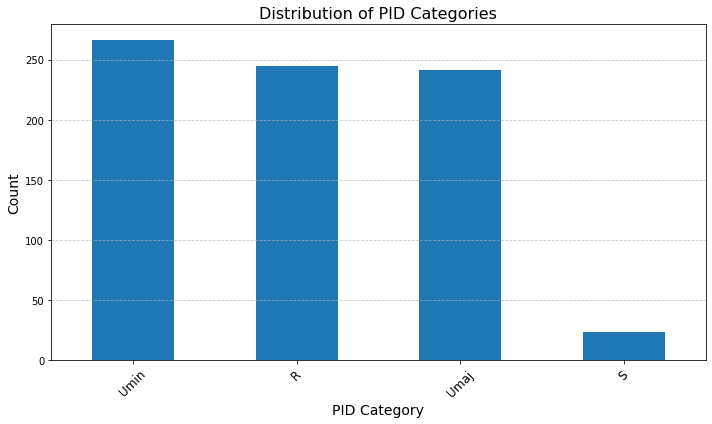

In [17]:
# Calculate the counts for each PID category
pid_counts = all_pred['PID'].value_counts()

# Create a counts table
counts_table = pid_counts.reset_index()
counts_table.columns = ['PID', 'Count']

# Display the counts table
print("Counts Table:")
print(counts_table)

# Plot the distribution
plt.figure(figsize=(10, 6))
pid_counts.plot(kind='bar')
plt.title('Distribution of PID Categories', fontsize=16)
plt.xlabel('PID Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()